## Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from datetime import datetime
from pandas import read_csv
import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

In [ ]:
from google.colab import files

upload = files.upload()

Saving olddata_timeseries.csv to olddata_timeseries.csv


In [ ]:
dataset = pd.read_csv('olddata_timeseries.csv')

In [ ]:
dataset.head()

,Unnamed: 0,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y,image
0,0:00:00,0.608362,0.854441,-0.000055,0.698247,0.760651,-0.000333,0.746123,0.656946,0.044067,0.755115,0.604441,0.091058,0.739370,0.575926,0.141614,0.725772,0.585692,0.113072,0.695175,0.512096,0.161715,0.663213,0.509508,0.146245,0.628682,0.509521,0.126684,0.684034,0.613054,0.141136,0.646297,0.518314,0.204615,0.597485,0.501900,0.150787,0.554109,0.481575,0.099543,0.646716,0.634919,0.170429,0.607791,0.539262,0.210424,0.559415,0.525524,0.153150,0.519742,0.512304,0.106917,0,올바르지않은000002.jpg
1,0:00:01,0.589413,0.821588,-0.000034,0.702744,0.755639,0.036021,0.748586,0.681648,0.097844,0.759795,0.646206,0.155630,0.754903,0.639004,0.219845,0.690097,0.573951,0.167258,0.697501,0.513798,0.236322,0.707604,0.498080,0.268360,0.709947,0.498431,0.286291,0.640792,0.590091,0.183851,0.633988,0.516383,0.278864,0.632618,0.487380,0.320688,0.624192,0.469256,0.345664,0.598285,0.619591,0.192634,0.582237,0.547222,0.267987,0.569858,0.497953,0.292022,0.554789,0.458668,0.302016,0,올바르지않은000003.jpg
2,0:00:02,0.582827,0.822190,-0.000059,0.696049,0.709424,0.027290,0.736974,0.623460,0.086927,0.750142,0.586168,0.143006,0.751907,0.564456,0.201499,0.683092,0.588985,0.185337,0.696308,0.519616,0.260084,0.704015,0.486982,0.295519,0.703320,0.475789,0.313845,0.636167,0.615811,0.202352,0.620556,0.532210,0.285914,0.603582,0.480073,0.309162,0.582252,0.448187,0.319748,0.597126,0.640185,0.209193,0.578182,0.561164,0.274916,0.558450,0.495127,0.276892,0.536495,0.450567,0.272208,0,올바르지않은000004.jpg
3,0:00:03,0.584996,0.814595,-0.000074,0.693013,0.706612,0.025968,0.728322,0.615963,0.084209,0.730672,0.562132,0.137349,0.718842,0.524435,0.194682,0.680784,0.590270,0.184177,0.695223,0.531300,0.253555,0.708813,0.503559,0.283300,0.713986,0.497755,0.298500,0.634850,0.611295,0.197661,0.623132,0.529886,0.280509,0.612963,0.475379,0.304912,0.599013,0.443166,0.316912,0.596124,0.629983,0.199357,0.580019,0.549568,0.263680,0.563891,0.480182,0.267539,0.546893,0.432029,0.264155,0,올바르지않은000005.jpg
4,0:00:04,0.595997,0.809426,-0.000088,0.676241,0.758483,0.025458,0.710127,0.681028,0.064673,0.718409,0.604908,0.103271,0.712553,0.551503,0.141213,0.678390,0.620803,0.101076,0.691506,0.527942,0.146585,0.699952,0.470541,0.171249,0.706209,0.432097,0.187284,0.634512,0.622219,0.116742,0.622363,0.524514,0.171224,0.613227,0.467908,0.199363,0.604555,0.440302,0.215500,0.595117,0.632040,0.129752,0.580715,0.538793,0.180257,0.568014,0.476205,0.196934,0.558610,0.440386,0.204046,0,올바르지않은000006.jpg


In [ ]:
dataset.shape

(9474, 54)

In [ ]:
dataset = dataset.drop(["image"], axis=1)

# 필요 없는 데이터는 지운다.

In [ ]:
print(dataset)

# 마지막 축 y에서 0은 올바르지 않은, 1은 올바른 젓가락질이라는 의미

     Unnamed: 0       x_0       y_0       z_0  ...      x_16      y_16      z_16  y
0       0:00:00  0.608362  0.854441 -0.000055  ...  0.519742  0.512304  0.106917  0
1       0:00:01  0.589413  0.821588 -0.000034  ...  0.554789  0.458668  0.302016  0
2       0:00:02  0.582827  0.822190 -0.000059  ...  0.536495  0.450567  0.272208  0
3       0:00:03  0.584996  0.814595 -0.000074  ...  0.546893  0.432029  0.264155  0
4       0:00:04  0.595997  0.809426 -0.000088  ...  0.558610  0.440386  0.204046  0
...         ...       ...       ...       ...  ...       ...       ...       ... ..
9469    2:37:49  0.729774  0.675329 -0.000037  ...  0.539114  0.657717 -0.055088  1
9470    2:37:50  0.730762  0.678127 -0.000051  ...  0.521322  0.659979 -0.042418  1
9471    2:37:51  0.729446  0.674886 -0.000058  ...  0.522258  0.643095 -0.044869  1
9472    2:37:52  0.732776  0.671563 -0.000054  ...  0.535909  0.633574 -0.054675  1
9473    2:37:53  0.734733  0.675541 -0.000061  ...  0.535082  0.639523 -0.04

In [ ]:
# data = data.rename(columns={'Unnamed: 0':'Time'})
dataset.columns = ['time', 'x_0','y_0','z_0','x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5','x_6','y_6','z_6','x_7','y_7','z_7','x_8','y_8','z_8', 'x_9','y_9','z_9','x_10','y_10','z_10','x_11','y_11','z_11','x_12','y_12','z_12','x_13','y_13','z_13','x_14','y_14','z_14','x_15','y_15','z_15','x_16','y_16','z_16', 'y']

In [ ]:
dataset.columns

Index(['time', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2',
       'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6',
       'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9',
       'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12',
       'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15',
       'z_15', 'x_16', 'y_16', 'z_16', 'y'],
      dtype='object')

In [ ]:
dataset = dataset.set_index('time')

# 시간 데이터를 index화 시킴

In [ ]:
dataset

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0:00:00,0.608362,0.854441,-0.000055,0.698247,0.760651,-0.000333,0.746123,0.656946,0.044067,0.755115,0.604441,0.091058,0.739370,0.575926,0.141614,0.725772,0.585692,0.113072,0.695175,0.512096,0.161715,0.663213,0.509508,0.146245,0.628682,0.509521,0.126684,0.684034,0.613054,0.141136,0.646297,0.518314,0.204615,0.597485,0.501900,0.150787,0.554109,0.481575,0.099543,0.646716,0.634919,0.170429,0.607791,0.539262,0.210424,0.559415,0.525524,0.153150,0.519742,0.512304,0.106917,0
0:00:01,0.589413,0.821588,-0.000034,0.702744,0.755639,0.036021,0.748586,0.681648,0.097844,0.759795,0.646206,0.155630,0.754903,0.639004,0.219845,0.690097,0.573951,0.167258,0.697501,0.513798,0.236322,0.707604,0.498080,0.268360,0.709947,0.498431,0.286291,0.640792,0.590091,0.183851,0.633988,0.516383,0.278864,0.632618,0.487380,0.320688,0.624192,0.469256,0.345664,0.598285,0.619591,0.192634,0.582237,0.547222,0.267987,0.569858,0.497953,0.292022,0.554789,0.458668,0.302016,0
0:00:02,0.582827,0.822190,-0.000059,0.696049,0.709424,0.027290,0.736974,0.623460,0.086927,0.750142,0.586168,0.143006,0.751907,0.564456,0.201499,0.683092,0.588985,0.185337,0.696308,0.519616,0.260084,0.704015,0.486982,0.295519,0.703320,0.475789,0.313845,0.636167,0.615811,0.202352,0.620556,0.532210,0.285914,0.603582,0.480073,0.309162,0.582252,0.448187,0.319748,0.597126,0.640185,0.209193,0.578182,0.561164,0.274916,0.558450,0.495127,0.276892,0.536495,0.450567,0.272208,0
0:00:03,0.584996,0.814595,-0.000074,0.693013,0.706612,0.025968,0.728322,0.615963,0.084209,0.730672,0.562132,0.137349,0.718842,0.524435,0.194682,0.680784,0.590270,0.184177,0.695223,0.531300,0.253555,0.708813,0.503559,0.283300,0.713986,0.497755,0.298500,0.634850,0.611295,0.197661,0.623132,0.529886,0.280509,0.612963,0.475379,0.304912,0.599013,0.443166,0.316912,0.596124,0.629983,0.199357,0.580019,0.549568,0.263680,0.563891,0.480182,0.267539,0.546893,0.432029,0.264155,0
0:00:04,0.595997,0.809426,-0.000088,0.676241,0.758483,0.025458,0.710127,0.681028,0.064673,0.718409,0.604908,0.103271,0.712553,0.551503,0.141213,0.678390,0.620803,0.101076,0.691506,0.527942,0.146585,0.699952,0.470541,0.171249,0.706209,0.432097,0.187284,0.634512,0.622219,0.116742,0.622363,0.524514,0.171224,0.613227,0.467908,0.199363,0.604555,0.440302,0.215500,0.595117,0.632040,0.129752,0.580715,0.538793,0.180257,0.568014,0.476205,0.196934,0.558610,0.440386,0.204046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2:37:49,0.729774,0.675329,-0.000037,0.686328,0.583300,-0.045465,0.622811,0.524037,-0.054550,0.562030,0.510666,-0.065902,0.510147,0.479840,-0.080788,0.572049,0.500146,0.043426,0.513587,0.476746,0.023393,0.474472,0.498293,-0.010391,0.447577,0.541040,-0.035464,0.566376,0.569308,0.059777,0.503182,0.566320,0.047725,0.461683,0.593688,0.015588,0.436353,0.633474,-0.006273,0.572817,0.633210,0.061954,0.515208,0.639919,0.029216,0.519962,0.645325,-0.026796,0.539114,0.657717,-0.055088,1
2:37:50,0.730762,0.678127,-0.000051,0.685368,0.585547,-0.047528,0.622184,0.524642,-0.055459,0.561427,0.513072,-0.065199,0.507748,0.485969,-0.078414,0.572717,0.500248,0.045804,0.513574,0.478276,0.028173,0.475178,0.500600,-0.010479,0.450794,0.543543,-0.041617,0.568171,0.569038,0.064548,0.506994,0.564009,0.052579,0.469677,0.592097,0.006036,0.454156,0.630732,-0.027494,0.574640,0.633484,0.071157,0.519629,0.636765,0.048818,0.511693,0.644615,-0.007812,0.521322,0.659979,-0.042418,1
2:37:51,0.729446,0.674886,-0.000058,0.685807,0.580573,-0.047345,0.623641,0.526362,-0.058591,0.564627,0.516952,-0.070749,0.511861,0.490841,-0.085827,0.571003,0.496489,0.041712,0.512642,0.473013,0

In [ ]:
values = dataset.values

In [ ]:
values

array([[ 6.08362436e-01,  8.54440808e-01, -5.51442000e-05, ...,
         5.12303531e-01,  1.06917247e-01,  0.00000000e+00],
       [ 5.89412987e-01,  8.21587622e-01, -3.39234000e-05, ...,
         4.58667815e-01,  3.02016169e-01,  0.00000000e+00],
       [ 5.82827032e-01,  8.22189808e-01, -5.87474000e-05, ...,
         4.50567067e-01,  2.72207767e-01,  0.00000000e+00],
       ...,
       [ 7.29446471e-01,  6.74886227e-01, -5.76649000e-05, ...,
         6.43094599e-01, -4.48693070e-02,  1.00000000e+00],
       [ 7.32776225e-01,  6.71562731e-01, -5.35432000e-05, ...,
         6.33573830e-01, -5.46749790e-02,  1.00000000e+00],
       [ 7.34733045e-01,  6.75541282e-01, -6.14416000e-05, ...,
         6.39522910e-01, -4.44711890e-02,  1.00000000e+00]])

In [ ]:
dataset = dataset.dropna(axis=1)
dataset

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,y_8,z_8,x_9,y_9,z_9,x_10,y_10,z_10,x_11,y_11,z_11,x_12,y_12,z_12,x_13,y_13,z_13,x_14,y_14,z_14,x_15,y_15,z_15,x_16,y_16,z_16,y
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0:00:00,0.608362,0.854441,-0.000055,0.698247,0.760651,-0.000333,0.746123,0.656946,0.044067,0.755115,0.604441,0.091058,0.739370,0.575926,0.141614,0.725772,0.585692,0.113072,0.695175,0.512096,0.161715,0.663213,0.509508,0.146245,0.628682,0.509521,0.126684,0.684034,0.613054,0.141136,0.646297,0.518314,0.204615,0.597485,0.501900,0.150787,0.554109,0.481575,0.099543,0.646716,0.634919,0.170429,0.607791,0.539262,0.210424,0.559415,0.525524,0.153150,0.519742,0.512304,0.106917,0
0:00:01,0.589413,0.821588,-0.000034,0.702744,0.755639,0.036021,0.748586,0.681648,0.097844,0.759795,0.646206,0.155630,0.754903,0.639004,0.219845,0.690097,0.573951,0.167258,0.697501,0.513798,0.236322,0.707604,0.498080,0.268360,0.709947,0.498431,0.286291,0.640792,0.590091,0.183851,0.633988,0.516383,0.278864,0.632618,0.487380,0.320688,0.624192,0.469256,0.345664,0.598285,0.619591,0.192634,0.582237,0.547222,0.267987,0.569858,0.497953,0.292022,0.554789,0.458668,0.302016,0
0:00:02,0.582827,0.822190,-0.000059,0.696049,0.709424,0.027290,0.736974,0.623460,0.086927,0.750142,0.586168,0.143006,0.751907,0.564456,0.201499,0.683092,0.588985,0.185337,0.696308,0.519616,0.260084,0.704015,0.486982,0.295519,0.703320,0.475789,0.313845,0.636167,0.615811,0.202352,0.620556,0.532210,0.285914,0.603582,0.480073,0.309162,0.582252,0.448187,0.319748,0.597126,0.640185,0.209193,0.578182,0.561164,0.274916,0.558450,0.495127,0.276892,0.536495,0.450567,0.272208,0
0:00:03,0.584996,0.814595,-0.000074,0.693013,0.706612,0.025968,0.728322,0.615963,0.084209,0.730672,0.562132,0.137349,0.718842,0.524435,0.194682,0.680784,0.590270,0.184177,0.695223,0.531300,0.253555,0.708813,0.503559,0.283300,0.713986,0.497755,0.298500,0.634850,0.611295,0.197661,0.623132,0.529886,0.280509,0.612963,0.475379,0.304912,0.599013,0.443166,0.316912,0.596124,0.629983,0.199357,0.580019,0.549568,0.263680,0.563891,0.480182,0.267539,0.546893,0.432029,0.264155,0
0:00:04,0.595997,0.809426,-0.000088,0.676241,0.758483,0.025458,0.710127,0.681028,0.064673,0.718409,0.604908,0.103271,0.712553,0.551503,0.141213,0.678390,0.620803,0.101076,0.691506,0.527942,0.146585,0.699952,0.470541,0.171249,0.706209,0.432097,0.187284,0.634512,0.622219,0.116742,0.622363,0.524514,0.171224,0.613227,0.467908,0.199363,0.604555,0.440302,0.215500,0.595117,0.632040,0.129752,0.580715,0.538793,0.180257,0.568014,0.476205,0.196934,0.558610,0.440386,0.204046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2:37:49,0.729774,0.675329,-0.000037,0.686328,0.583300,-0.045465,0.622811,0.524037,-0.054550,0.562030,0.510666,-0.065902,0.510147,0.479840,-0.080788,0.572049,0.500146,0.043426,0.513587,0.476746,0.023393,0.474472,0.498293,-0.010391,0.447577,0.541040,-0.035464,0.566376,0.569308,0.059777,0.503182,0.566320,0.047725,0.461683,0.593688,0.015588,0.436353,0.633474,-0.006273,0.572817,0.633210,0.061954,0.515208,0.639919,0.029216,0.519962,0.645325,-0.026796,0.539114,0.657717,-0.055088,1
2:37:50,0.730762,0.678127,-0.000051,0.685368,0.585547,-0.047528,0.622184,0.524642,-0.055459,0.561427,0.513072,-0.065199,0.507748,0.485969,-0.078414,0.572717,0.500248,0.045804,0.513574,0.478276,0.028173,0.475178,0.500600,-0.010479,0.450794,0.543543,-0.041617,0.568171,0.569038,0.064548,0.506994,0.564009,0.052579,0.469677,0.592097,0.006036,0.454156,0.630732,-0.027494,0.574640,0.633484,0.071157,0.519629,0.636765,0.048818,0.511693,0.644615,-0.007812,0.521322,0.659979,-0.042418,1
2:37:51,0.729446,0.674886,-0.000058,0.685807,0.580573,-0.047345,0.623641,0.526362,-0.058591,0.564627,0.516952,-0.070749,0.511861,0.490841,-0.085827,0.571003,0.496489,0.041712,0.512642,0.473013,0

In [ ]:
from sklearn.model_selection import train_test_split

# shuffle = True

# X = ['Time', 'x_0','y_0','z_0','x_1','y_1','z_1','x_2','y_2','z_2','x_3','y_3','z_3','x_4','y_4','z_4','x_5','y_5','z_5','x_6','y_6','z_6','x_7','y_7','z_7','x_8','y_8','z_8', 'x_9','y_9','z_9','x_10','y_10','z_10','x_11','y_11','z_11','x_12','y_12','z_12','x_13','y_13','z_13','x_14','y_14','z_14','x_15','y_15','z_15','x_16','y_16','z_16']
# # X = ['x_0',	'y_0', 'z_0',	'x_1',	'y_1',	'z_1',	'x_2',	'y_2',	'z_2',	'x_3',	'y_3',	'z_3',	'x_4',	'y_4',	'z_4',	'x_5',	'y_5',	'z_5',	'x_6',	'y_6',	'z_6',	'x_7',	'y_7',	'z_7',	'x_8',	'y_8',	'z_8',	'x_9',	'y_9',	'z_9',	'x_10',	'y_10',	'z_10',	'x_11',	'y_11',	'z_11',	'x_12',	'y_12',	'z_12', 'x_13',	'y_13',	'z_13',	'x_14',	'y_14',	'z_14',	'x_15',	'y_15',	'z_15',	'x_16',	'y_16',	'z_16']
# y = data['y']

In [ ]:
dataset.columns

Index(['x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3',
       'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6',
       'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9',
       'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12',
       'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
       'x_16', 'y_16', 'z_16', 'y'],
      dtype='object')

In [ ]:
len(dataset.columns)
groups = []
for i in range(0, len(dataset.columns)):
  groups.append(i)

In [ ]:
len(groups)

52

In [ ]:
groups

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

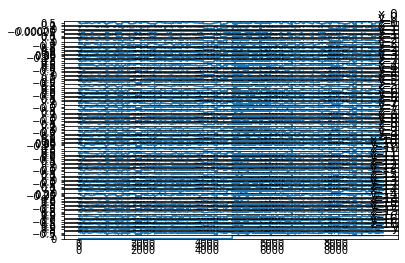

In [ ]:
from matplotlib import pyplot

i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
# load dataset
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var50(t)  var51(t)  var52(t)
1   0.663984   0.811649   0.647258  ...  0.396871  0.891252       0.0
2   0.643974   0.780615   0.687184  ...  0.388231  0.860470       0.0
3   0.637020   0.781184   0.640478  ...  0.368461  0.852153       0.0
4   0.639310   0.774010   0.611671  ...  0.377374  0.790080       0.0
5   0.650927   0.769128   0.584963  ...  0.440264  0.784783       0.0

[5 rows x 97 columns]


In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 96) (8760,) (713, 1, 96) (713,)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Epoch 1/50
122/122 - 2s - loss: 0.1406 - val_loss: 0.0933
Epoch 2/50
122/122 - 0s - loss: 0.3597 - val_loss: 0.1430
Epoch 3/50
122/122 - 0s - loss: 0.5515 - val_loss: 0.6591
Epoch 4/50
122/122 - 0s - loss: 0.4707 - val_loss: 0.6088
Epoch 5/50
122/122 - 0s - loss: 0.4937 - val_loss: 0.7600
Epoch 6/50
122/122 - 0s - loss: 0.4426 - val_loss: 0.5752
Epoch 7/50
122/122 - 0s - loss: 0.4348 - val_loss: 0.3848
Epoch 8/50
122/122 - 0s - loss: 0.4461 - val_loss: 0.2193
Epoch 9/50
122/122 - 0s - loss: 0.4191 - val_loss: 0.1715
Epoch 10/50
122/122 - 0s - loss: 0.4226 - val_loss: 0.1707
Epoch 11/50
122/122 - 0s - loss: 0.3431 - val_loss: 0.0816
Epoch 12/50
122/122 - 0s - loss: 0.3826 - val_loss: 0.2344
Epoch 13/50
122/122 - 0s - loss: 0.3166 - val_loss: 0.0601
Epoch 14/50
122/122 - 0s - loss: 0.3549 - val_loss: 0.0563
Epoch 15/50
122/122 - 0s - loss: 0.2980 - val_loss: 0.1345
Epoch 16/50
122/122 - 0s - loss: 0.2963 - val_loss: 0.1421
Epoch 17/50
122/122 - 0s - loss: 0.2700 - val_loss: 0.0339
Epoch 

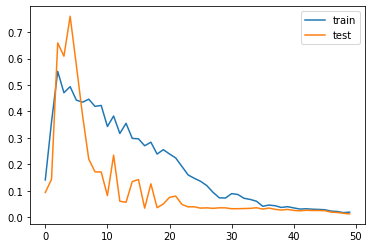

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: ignored

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)